In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import math
import sys
from scipy.interpolate import interp1d

from matplotlib import colors
colorlist=list(colors.TABLEAU_COLORS)

In [2]:
# Read the data
# All the spectra are l(l+1)/2pi Cl

# Points from theory:
fileGA = "/content/GA_inflationV_cl_lensed.dat"
fileprior = "/content/GA_inflationV_cl_lensed_staro.dat"

# Data from Planck:
# TT
TT_full = "/content/COM_PowerSpect_CMB-TT-full_R3.01.txt"
TT_binned = "/content/COM_PowerSpect_CMB-TT-binned_R3.01.txt"

# TE
TE_full = "/content/COM_PowerSpect_CMB-TE-full_R3.01.txt"
TE_binned = "/content/COM_PowerSpect_CMB-TE-binned_R3.02.txt"

# EE
EE_full = "/content/COM_PowerSpect_CMB-EE-full_R3.01.txt"
EE_binned = "/content/COM_PowerSpect_CMB-EE-binned_R3.02.txt"

# Read the files (GA and prior):
l_GA,TT_GA, EE_GA, BB_GA, TE_GA, dd_GA, dT_GA, dE_GA =np.loadtxt(fileGA,skiprows=10,unpack=True)
l_prior,TT_prior, EE_prior, BB_prior, TE_prior, dd_prior, dT_prior, dE_prior =np.loadtxt(fileprior,skiprows=10,unpack=True)

# Read the files for TT (full and binned):
l_TT_f, Dl_TT_f, dDL_m_TT_f, dDL_p_TT_f = np.loadtxt(TT_full,skiprows=1,unpack=True)
l_TT_b, Dl_TT_b, dDL_m_TT_b, dDL_p_TT_b ,bdD_TT_b = np.loadtxt(TT_binned,skiprows=1,unpack=True)

# Read the files for TE (full and binned):
l_TE_f, Dl_TE_f, dDL_m_TE_f, dDL_p_TE_f = np.loadtxt(TE_full,skiprows=1,unpack=True)
l_TE_b, Dl_TE_b, dDL_m_TE_b, dDL_p_TE_b ,bdD_TE_b = np.loadtxt(TE_binned,skiprows=1,unpack=True)

# Read the files for EE (full and binned):
l_EE_f, Dl_EE_f, dDL_m_EE_f, dDL_p_EE_f = np.loadtxt(EE_full,skiprows=1,unpack=True)
l_EE_b, Dl_EE_b, dDL_m_EE_b, dDL_p_EE_b ,bdD_EE_b = np.loadtxt(EE_binned,skiprows=1,unpack=True)

# The asymmetric errors for TT, TE and EE
asymmetric_error_TT_f = np.array(list(zip(dDL_m_TT_f, dDL_p_TT_f))).T
asymmetric_error_TT_b = np.array(list(zip(dDL_m_TT_b, dDL_p_TT_b))).T

asymmetric_error_TE_f = np.array(list(zip(dDL_m_TE_f, dDL_p_TE_f))).T
asymmetric_error_TE_b = np.array(list(zip(dDL_m_TE_b, dDL_p_TE_b))).T

asymmetric_error_EE_f = np.array(list(zip(dDL_m_EE_f, dDL_p_EE_f))).T
asymmetric_error_EE_b = np.array(list(zip(dDL_m_EE_b, dDL_p_EE_b))).T

In [3]:
# interpolate the data
int_prior_TT = interp1d(l_prior, TT_prior)
int_prior_TE = interp1d(l_prior, TE_prior)
int_prior_EE = interp1d(l_prior, EE_prior)

#
TT_prior_inter=int_prior_TT(l_TT_b)
TE_prior_inter=int_prior_TE(l_TE_b)
EE_prior_inter=int_prior_EE(l_EE_b)

#
TT_prior_inter_f=int_prior_TT(l_TT_f)
TE_prior_inter_f=int_prior_TE(l_TE_f)
EE_prior_inter_f=int_prior_EE(l_EE_f)

In [16]:
len(l_TE_f)

1995

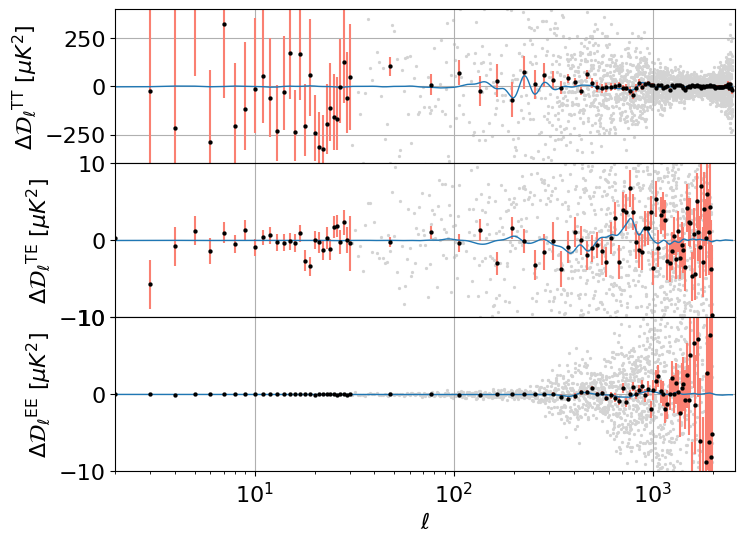

In [21]:
fig1 = plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})

ax1 = plt.subplot(3, 1, 1)
plt.xscale("log")
plt.grid()
plt.ylabel(r'$\Delta \mathcal{D}_\ell{}^\mathrm{TT}~[\mu K^2]$')
plt.errorbar(l_TT_f[0:29], Dl_TT_f[0:29]-TT_prior[0:29], yerr=asymmetric_error_TT_f[0:29,0:29], fmt='.',color='black',ecolor='salmon',mew=0.1);
plt.errorbar(l_TT_b, Dl_TT_b-TT_prior_inter, yerr=asymmetric_error_TT_b, fmt='.',color='black',ecolor='salmon',mew=0.1);
plt.scatter(l_TT_f[29:2507], Dl_TT_f[29:2507]-TT_prior[29:2507], marker=".", color='lightgray',s=7);
plt.plot(l_GA, TT_GA-TT_prior, color=colorlist[0], label=r'GA',linewidth=1)
ax1.set_ylim([-400,400])
ax1.set_xlim([2,2600])

ax2 = plt.subplot(3, 1, 2)
plt.xscale("log")
plt.grid()
plt.ylabel(r'$\Delta \mathcal{D}_\ell{}^\mathrm{TE}~[\mu K^2]$')
plt.errorbar(l_TE_f[0:29], Dl_TE_f[0:29]-TE_prior[0:29], yerr=asymmetric_error_TE_f[0:29,0:29], fmt='.',color='black',ecolor='salmon',mew=0.1);
plt.errorbar(l_TE_b, Dl_TE_b-TE_prior_inter, yerr=asymmetric_error_TE_b, fmt='.',color='black',ecolor='salmon',mew=0.1);
plt.scatter(l_TE_f[29:1995], Dl_TE_f[29:1995]-TE_prior[29:1995], marker=".", color='lightgray',s=7);
plt.plot(l_GA, TE_GA-TE_prior, color=colorlist[0], label=r'GA',linewidth=1)
ax2.set_ylim([-10,10])
ax2.set_xlim([2,2600])

ax3 = plt.subplot(3, 1, 3)
plt.xscale("log")
plt.grid()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\Delta \mathcal{D}_\ell{}^\mathrm{EE}~[\mu K^2]$')
plt.errorbar(l_EE_f[0:29], Dl_EE_f[0:29]-EE_prior[0:29], yerr=asymmetric_error_EE_f[0:29,0:29], fmt='.',color='black',ecolor='salmon',mew=0.1);
plt.errorbar(l_EE_b, Dl_EE_b-EE_prior_inter, yerr=asymmetric_error_EE_b, fmt='.',color='black',ecolor='salmon',mew=0.1);
plt.scatter(l_EE_f[29:1995], Dl_EE_f[29:1995]-EE_prior[29:1995], marker=".", color='lightgray',s=7);
plt.plot(l_GA, EE_GA-EE_prior, color=colorlist[0], label=r'GA',linewidth=1)
ax3.set_ylim([-10,10])
ax3.set_xlim([2,2600])

ax = plt.gca()
for ax in fig1.get_axes():
    ax.label_outer()
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()
fig1.savefig('Delta_D_L_TT_TE_EE_full_1.pdf', bbox_inches='tight')

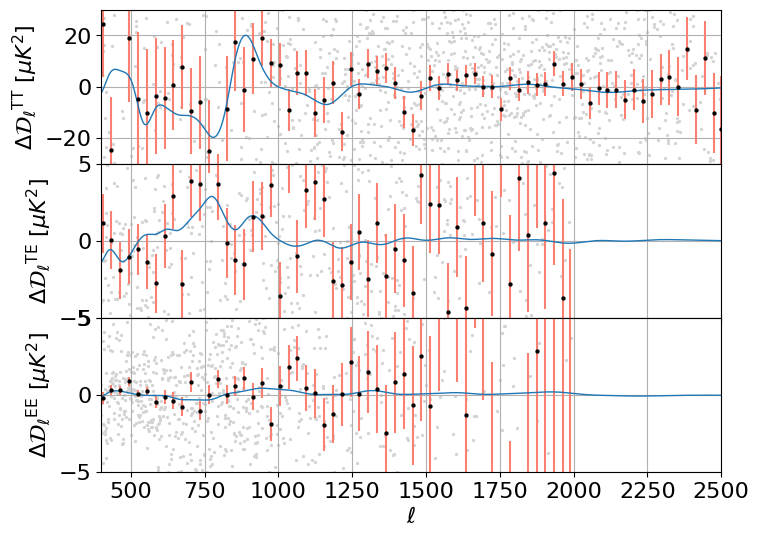

In [22]:
fig2 = plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})

ax1 = plt.subplot(3, 1, 1)
#plt.xscale("log")
plt.grid()
plt.ylabel(r'$\Delta \mathcal{D}_\ell{}^\mathrm{TT}~[\mu K^2]$')
plt.errorbar(l_TT_f[0:29], Dl_TT_f[0:29]-TT_prior[0:29], yerr=asymmetric_error_TT_f[0:29,0:29], fmt='.',color='black',ecolor='salmon',mew=0.1);
plt.errorbar(l_TT_b, Dl_TT_b-TT_prior_inter, yerr=asymmetric_error_TT_b, fmt='.',color='black',ecolor='salmon',mew=0.1);
plt.scatter(l_TT_f[29:2507], Dl_TT_f[29:2507]-TT_prior[29:2507], marker=".", color='lightgray',s=7);
plt.plot(l_GA, TT_GA-TT_prior, color=colorlist[0], label=r'GA',linewidth=1)
ax1.set_ylim([-30,30])
ax1.set_xlim([400,2500])
ax1.label_outer()

ax2 = plt.subplot(3, 1, 2)
#plt.xscale("log")
plt.grid()
plt.ylabel(r'$\Delta \mathcal{D}_\ell{}^\mathrm{TE}~[\mu K^2]$')
plt.errorbar(l_TE_f[0:29], Dl_TE_f[0:29]-TE_prior[0:29], yerr=asymmetric_error_TE_f[0:29,0:29], fmt='.',color='black',ecolor='salmon',mew=0.1);
plt.errorbar(l_TE_b, Dl_TE_b-TE_prior_inter, yerr=asymmetric_error_TE_b, fmt='.',color='black',ecolor='salmon',mew=0.1);
plt.scatter(l_TE_f[29:1995], Dl_TE_f[29:1995]-TE_prior[29:1995], marker=".", color='lightgray',s=7);
plt.plot(l_GA, TE_GA-TE_prior, color=colorlist[0], label=r'GA',linewidth=1)
ax2.set_ylim([-5,5])
ax2.set_xlim([400,2500])
ax2.label_outer()

ax3 = plt.subplot(3, 1, 3)
#plt.xscale("log")
plt.grid()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\Delta \mathcal{D}_\ell{}^\mathrm{EE}~[\mu K^2]$')
plt.errorbar(l_EE_f[0:29], Dl_EE_f[0:29]-EE_prior[0:29], yerr=asymmetric_error_EE_f[0:29,0:29], fmt='.',color='black',ecolor='salmon',mew=0.1);
plt.errorbar(l_EE_b, Dl_EE_b-EE_prior_inter, yerr=asymmetric_error_EE_b, fmt='.',color='black',ecolor='salmon',mew=0.1);
plt.scatter(l_EE_f[29:1995], Dl_EE_f[29:1995]-EE_prior[29:1995], marker=".", color='lightgray',s=7);
plt.plot(l_GA, EE_GA-EE_prior, color=colorlist[0], label=r'GA',linewidth=1)
ax3.set_ylim([-5,5])
ax3.set_xlim([400,2500])

#ax = plt.gca()
#for ax in fig1.get_axes():
#    ax.label_outer()
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()
fig2.savefig('Delta_D_L_TT_TE_EE_zoom_1.pdf', bbox_inches='tight')